<a href="https://colab.research.google.com/github/Trading-com-Dados/tutoriais_publicos/blob/main/Tutorial%20Risco_x_Retorno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalando e importando bibliotecas

In [ ]:
!pip install investpy
!pip install yfinance

     |████████████████████████████████| 4.4 MB 5.2 MB/s 
     |████████████████████████████████| 235 kB 51.5 MB/s 
     |████████████████████████████████| 6.3 MB 38.4 MB/s 
     |████████████████████████████████| 510 kB 51.0 MB/s 
  Created wheel for investpy: filename=investpy-1.0.7-py3-none-any.whl size=4495221 sha256=584fde11de3a7b60d39fbc635dbfcdb422f7c28f547013a81daa0feb0b485bd6
  Stored in directory: /root/.cache/pip/wheels/50/bb/ee/760eeb6cc7ed8efc1b1b23b13b6b9f17fb1ed530fb04bd16f5
Successfully built investpy
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=c5ca983f007f68db6e4f30f28a03073f73e754e0e8db6a2622661411daf7ed3e
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

# 2. Importando dados

In [ ]:
ativos = ['PETR4.SA','VALE3.SA', 'WEGE3.SA', 'LOGN3.SA', 'ITUB4.SA',
          'RADL3.SA', 'B3SA3.SA','BBAS3.SA','SMAL11.SA']

In [ ]:
inicio = '2019-01-01'
fim = '2021-08-24'

In [ ]:
precos = pd.DataFrame()

for i in ativos:
  precos[i] = yf.download(i, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
precos.head()

,PETR4.SA,VALE3.SA,WEGE3.SA,LOGN3.SA,ITUB4.SA,RADL3.SA,B3SA3.SA,BBAS3.SA,SMAL11.SA
Date,,,,,,,,,
2019-01-02,21.260366,44.829338,8.693207,8.13,33.612011,11.161046,8.481046,41.488239,89.000000
2019-01-03,21.781713,42.995453,8.891438,8.31,34.166157,11.135455,8.850316,41.658966,89.000000
2019-01-04,21.843567,45.794544,8.992972,8.38,33.593849,11.294898,8.529873,41.658966,90.500000
2019-01-07,22.188189,45.548859,8.852759,8.25,33.657429,11.042939,8.484097,41.385780,88.199997
2019-01-08,22.055641,45.987583,8.780235,7.95,34.084389,11.446469,8.508512,40.916275,88.830002


# 3. Cálculo dos retornos

In [ ]:
ativos_retornos = precos.pct_change()

In [ ]:
ativos_retornos.head()

,PETR4.SA,VALE3.SA,WEGE3.SA,LOGN3.SA,ITUB4.SA,RADL3.SA,B3SA3.SA,BBAS3.SA,SMAL11.SA
Date,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.024522,-0.040908,0.022803,0.022140,0.016487,-0.002293,0.043541,0.004115,0.000000
2019-01-04,0.002840,0.065102,0.011419,0.008424,-0.016751,0.014318,-0.036207,0.000000,0.016854
2019-01-07,0.015777,-0.005365,-0.015591,-0.015513,0.001893,-0.022307,-0.005366,-0.006558,-0.025414
2019-01-08,-0.005974,0.009632,-0.008192,-0.036364,0.012685,0.036542,0.002878,-0.011345,0.007143


In [ ]:
ativos_retornos = ativos_retornos.dropna()

# 5. Normalizando preços

In [ ]:
normalizado = precos/precos.iloc[0]

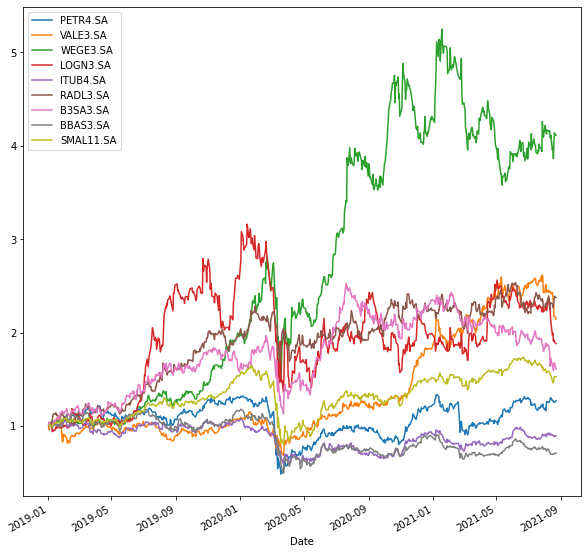

In [ ]:
normalizado.plot(figsize = (10,10));

# 6. Criando um DF consolidado com retorno vs. volatilidade

In [ ]:
ativos_retornos.std()

PETR4.SA     0.032293
VALE3.SA     0.028569
WEGE3.SA     0.027351
LOGN3.SA     0.040655
ITUB4.SA     0.023021
RADL3.SA     0.022383
B3SA3.SA     0.027879
BBAS3.SA     0.028448
SMAL11.SA    0.021954
dtype: float64

In [ ]:
volatilidade = pd.DataFrame(ativos_retornos.std(), columns= ['Vol'] )

In [ ]:
retornos_medios = pd.DataFrame(ativos_retornos.mean(), columns= ['Returns'] )

In [ ]:
risco_retorno = pd.concat([retornos_medios, volatilidade], axis = 1)

In [ ]:
risco_retorno

,Returns,Vol
PETR4.SA,0.000913,0.032293
VALE3.SA,0.001586,0.028569
WEGE3.SA,0.002552,0.027351
LOGN3.SA,0.001786,0.040655
ITUB4.SA,0.000095,0.023021
RADL3.SA,0.001580,0.022383
B3SA3.SA,0.001120,0.027879
BBAS3.SA,-0.000120,0.028448
SMAL11.SA,0.000899,0.021954


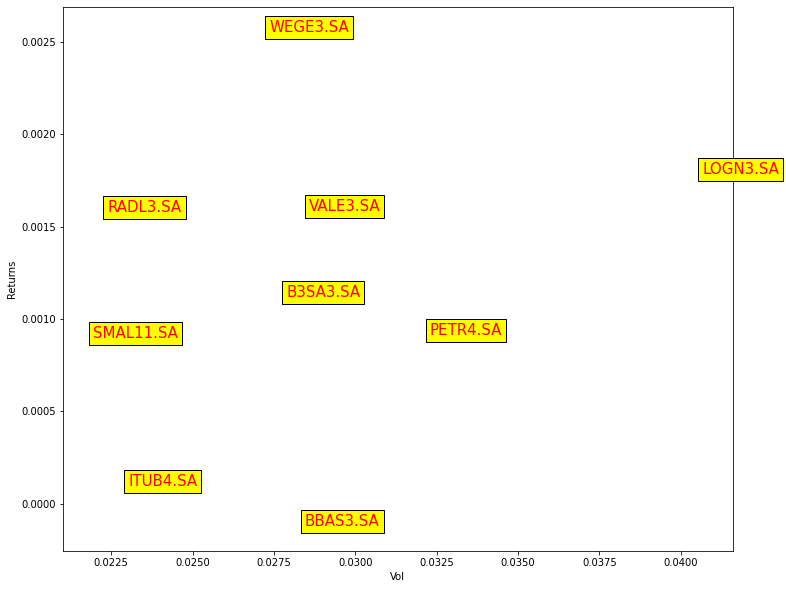

In [ ]:
plt.subplots(figsize = (12,10))

sns.scatterplot(data = risco_retorno, x = 'Vol', y = 'Returns')

for i in range(risco_retorno.shape[0]):
  plt.text(x = risco_retorno.Vol[i], y = risco_retorno.Returns[i], 
           s = risco_retorno.index[i],
           fontdict = dict(color = 'red', size = 15),
           bbox = dict(facecolor = 'yellow'))